In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5
X += 0.28 * np.random.randn(m, 3)
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]
X

array([[-0.47562927, -1.18002627, -0.18665138],
       [-0.32908278,  0.18101846, -0.32767249],
       [ 1.1241412 ,  0.33792292,  0.15481443],
       [ 0.28072425, -0.21472162,  0.43963185],
       [-0.59903727, -0.94120105,  0.06412454],
       [-0.19688428, -0.59920621,  0.01191996],
       [-0.49635908, -1.18078845,  0.17385141],
       [ 0.57308241,  0.89868775,  0.66600244],
       [ 0.59410487, -0.55817151,  0.2549555 ],
       [ 1.17064931,  0.37224377,  0.80362823],
       [-1.1730746 , -1.04622548, -0.08061077],
       [-0.60011541, -0.3620432 , -0.50511579],
       [ 0.4963413 ,  0.74149446,  0.76848193],
       [-0.39977922, -0.95243354, -0.15466053],
       [-0.35448133, -0.44161974, -0.07728984],
       [-0.42846627, -0.63087978,  0.31216388],
       [-0.48357266, -0.92949165, -0.12834249],
       [-0.30000318, -0.94201494,  0.07449738],
       [-0.14919128, -0.76135868, -0.35919894],
       [-0.42432217, -0.85484973, -0.22736351],
       [ 0.29610766, -0.47325168,  0.672

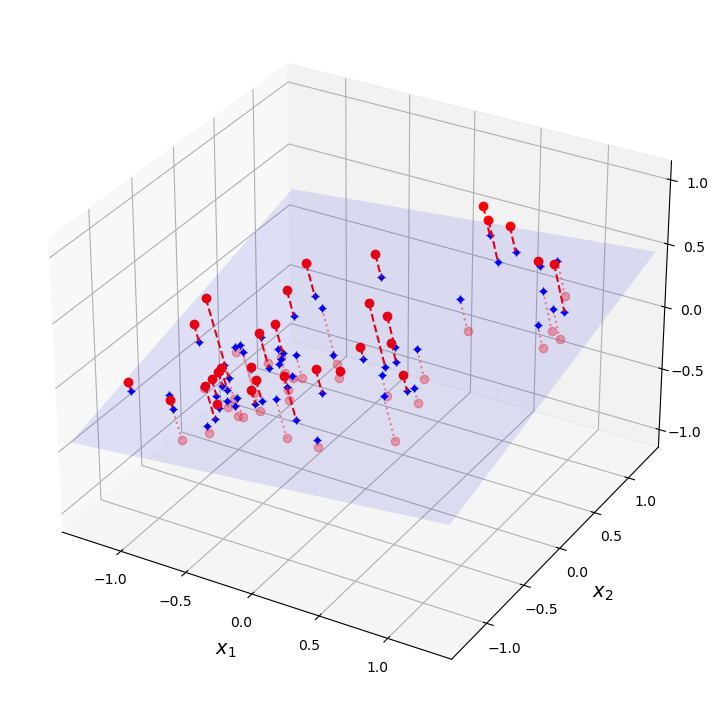

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")
        
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

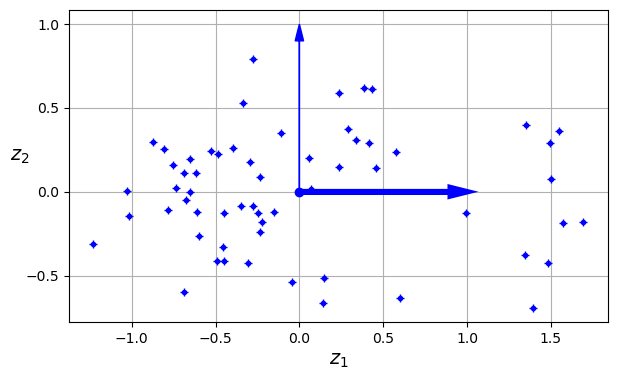

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
save_fig("dataset_2d_plot")

In [8]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

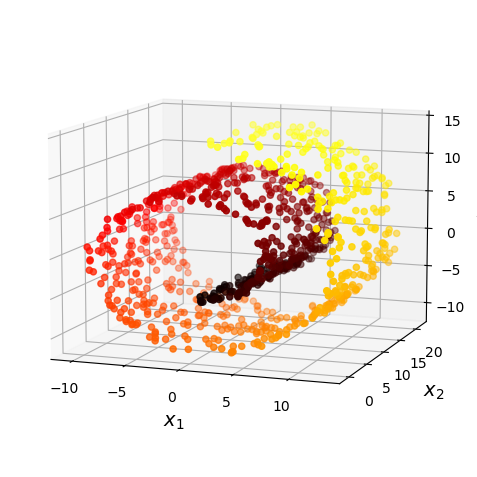

In [9]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
save_fig("swiss_roll_plot")
plt.show()

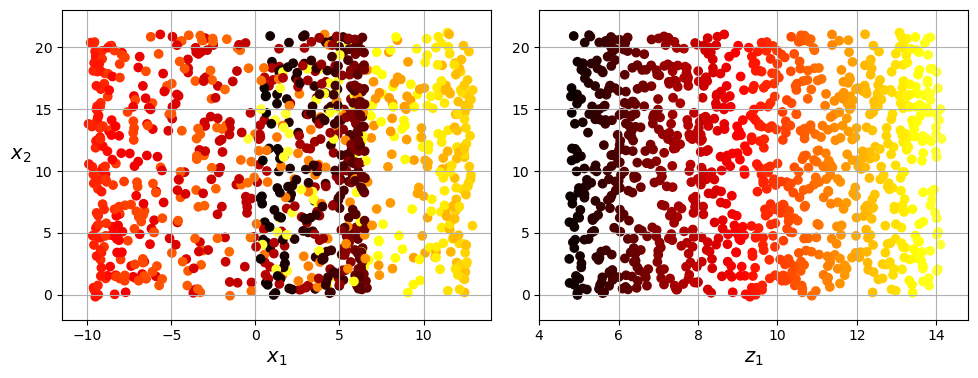

In [10]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

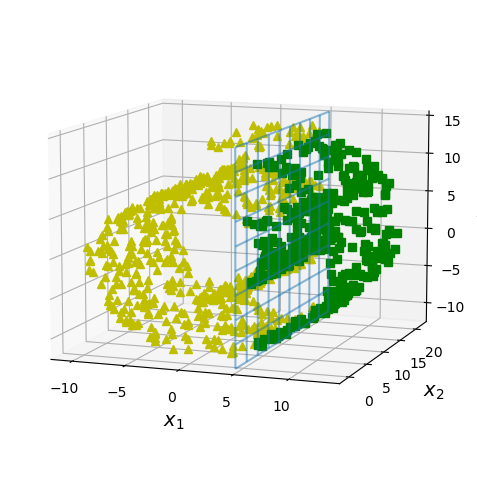

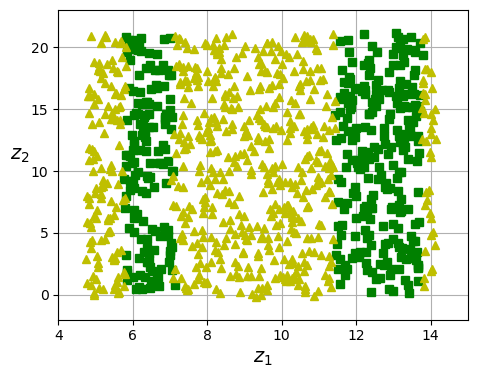

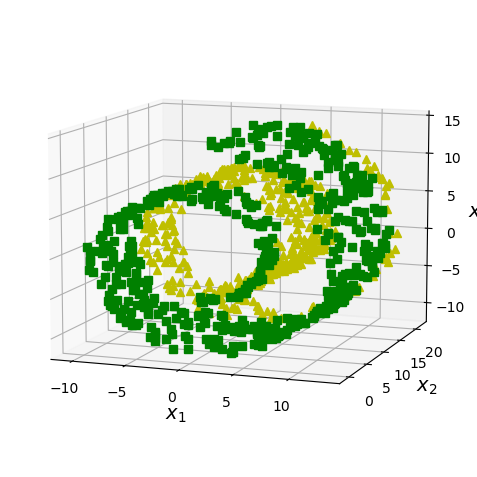

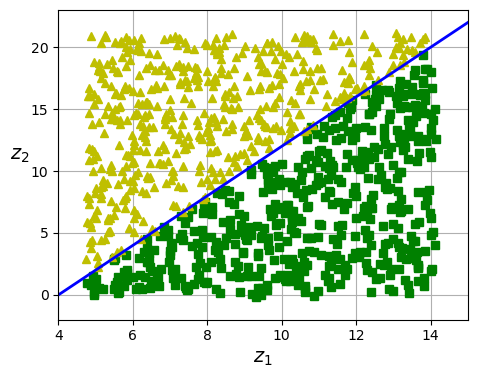

In [11]:
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot2")
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot4")
plt.show()

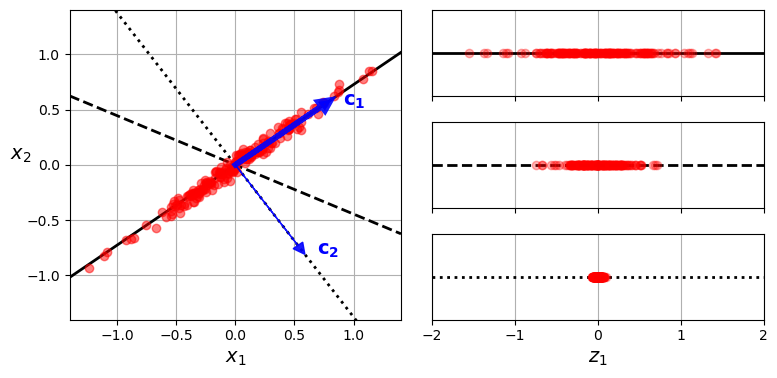

In [12]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10 
X_line = X_line @ np.array([[stretch, 0], [0, 1]])
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

save_fig("pca_best_projection_plot")
plt.show()

In [13]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

In [14]:
m, n = X.shape
sigma = np.zeros_like(X_centered)
sigma[:n, :n] = np.diag(s)
assert np.allclose(X_centered, U @ sigma @ Vt)

In [15]:
W2 = Vt[:2].T
X2D = X_centered @ W2
X2D

array([[-8.73231190e-01, -2.94598030e-01],
       [ 1.48885182e-01,  5.14935573e-01],
       [ 1.35121872e+00, -3.99501548e-01],
       [ 4.54366763e-01, -1.39984497e-01],
       [-7.34389086e-01, -2.28934648e-02],
       [-2.33347464e-01, -8.67844755e-02],
       [-8.08435321e-01, -2.52457557e-01],
       [ 1.48281454e+00,  4.22796305e-01],
       [ 3.85679006e-01, -6.16229365e-01],
       [ 1.54972180e+00, -3.60381563e-01],
       [-1.22938760e+00,  3.12504780e-01],
       [-4.54653275e-01,  3.28839370e-01],
       [ 1.34315899e+00,  3.79446240e-01],
       [-6.55233341e-01, -1.92367174e-01],
       [-2.49510114e-01,  1.28486810e-01],
       [-3.46562831e-01,  8.32312189e-02],
       [-6.90221113e-01, -1.13712645e-01],
       [-5.29757591e-01, -2.40403321e-01],
       [-3.96344855e-01, -2.60334107e-01],
       [-6.19519220e-01, -1.13588889e-01],
       [ 3.34910399e-01, -3.09476565e-01],
       [-4.52441114e-01,  1.28501562e-01],
       [-1.02718730e+00, -7.20555799e-03],
       [ 2.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

In [17]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [18]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [19]:
1 - pca.explained_variance_ratio_.sum()

0.09028309326742034

In [20]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [21]:
d

154

In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [23]:
pca.n_components_

154

In [24]:
pca.explained_variance_ratio_.sum()

0.9501960192613033

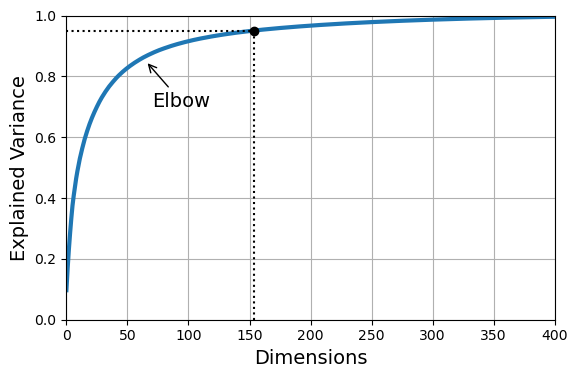

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [27]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [29]:
grid_search.best_params_

{'pca__n_components': 67}

In [30]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [31]:
X_recovered = pca.inverse_transform(X_reduced)

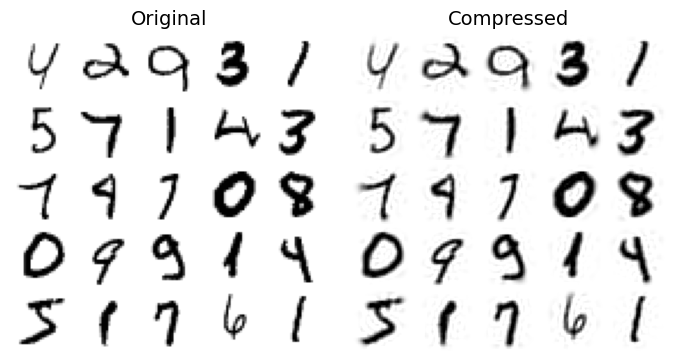

In [32]:
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig("mnist_compression_plot")

In [33]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced

array([[ 123.93258864, -312.67426198,  -24.51405174, ...,  -62.00213296,
          -8.8147422 ,  -66.93993166],
       [1011.71837586, -294.85703831,  596.33956108, ...,  -24.52514836,
          26.58534428,   16.99077095],
       [ -51.84960804,  392.17315289, -188.50974941, ...,   -8.99144972,
          -2.99473092,   56.93622984],
       ...,
       [-178.0534496 ,  160.0782111 , -257.61308227, ...,   35.30439525,
          -2.75142691,   23.97581712],
       [ 130.60607212,   -5.59193632,  513.85867376, ...,  -15.84132904,
         -18.38612585,   39.40742042],
       [-173.43595246,  -24.71880228,  556.01889398, ...,   29.62816702,
         -52.61652274,   27.99524134]])

In [34]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_reduced

array([[ 123.93240015,  312.67412765,   24.51396855, ...,   55.02414967,
         -18.82319306,   57.12605157],
       [1011.71883902,  294.85791533, -596.3396284 , ...,   40.79115354,
         -28.52753525,  -32.93944347],
       [ -51.84977972, -392.17395257,  188.50798593, ...,   18.5109603 ,
         -75.96611653,   -7.67736302],
       ...,
       [-178.0534095 , -160.07838721,  257.61233558, ...,  -57.3811145 ,
           6.70673288,  -54.26797595],
       [ 130.60654125,    5.59174593, -513.85834969, ...,  -22.43044205,
          12.51568244,  -36.3004746 ],
       [-173.43566358,   24.71937319, -556.01892138, ...,  -48.33215133,
          19.2936437 ,  -30.58306681]])

In [35]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

In [36]:
X_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

In [37]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, eps = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=eps)
d

7300

In [38]:
d = int(4 * np.log(m) / (eps ** 2 / 2 - eps ** 3 / 3))
d

7300

In [39]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)

X = np.random.randn(m, n)
X_reduced = X @ P.T

In [40]:
X_reduced

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       ...,
       [ 0.18867284,  0.58379053,  1.42444552, ...,  0.13507484,
         1.83874287, -0.39265772],
       [ 2.54718434,  0.32063561, -3.59830134, ...,  0.49247486,
         0.46798188,  0.09910125],
       [ 3.68422382, -2.65487692,  0.55763148, ...,  2.14734207,
        -1.82840766,  0.76915154]])

In [41]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=eps, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [42]:
X_reduced

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       ...,
       [ 0.18867284,  0.58379053,  1.42444552, ...,  0.13507484,
         1.83874287, -0.39265772],
       [ 2.54718434,  0.32063561, -3.59830134, ...,  0.49247486,
         0.46798188,  0.09910125],
       [ 3.68422382, -2.65487692,  0.55763148, ...,  2.14734207,
        -1.82840766,  0.76915154]])

In [43]:
np.allclose(P, gaussian_rnd_proj.components_)

True

In [44]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [45]:
X_recovered

array([[-0.78285178,  0.47707426,  0.6955112 , ...,  0.98188064,
         0.87441748, -0.71906857],
       [ 0.97744839, -0.14541327, -0.3545605 , ..., -0.18058073,
         0.32781621,  0.81330977],
       [ 0.20082204, -0.05543369, -1.29965877, ..., -0.81101979,
         0.40761253, -0.61037469],
       ...,
       [ 0.91281977, -1.12843126,  0.41045219, ..., -0.07550752,
         0.17787192,  0.1177291 ],
       [ 0.8433102 , -0.78806083,  0.76058445, ..., -0.49409368,
        -0.08168829,  0.02277401],
       [-0.11412415, -0.30551047,  0.97617111, ..., -0.25285318,
        -0.56290596,  0.38087206]])

In [46]:
from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
2.72 s ± 62.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
2.15 s ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
6.68 s ± 239 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
4.07 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

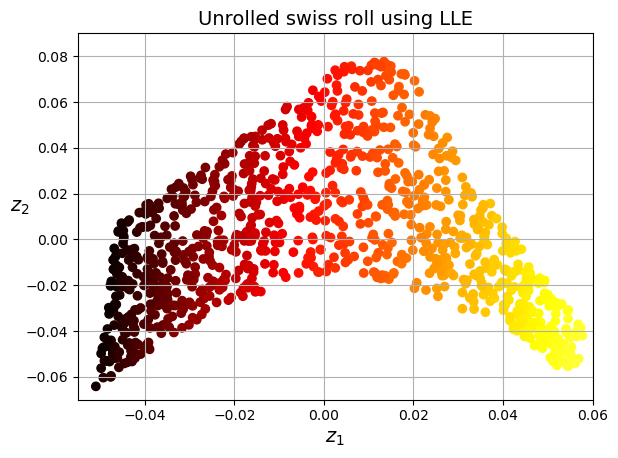

In [48]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)
plt.title("Unrolled swiss roll using LLE")

save_fig("lle_unrolling_plot")
plt.show()

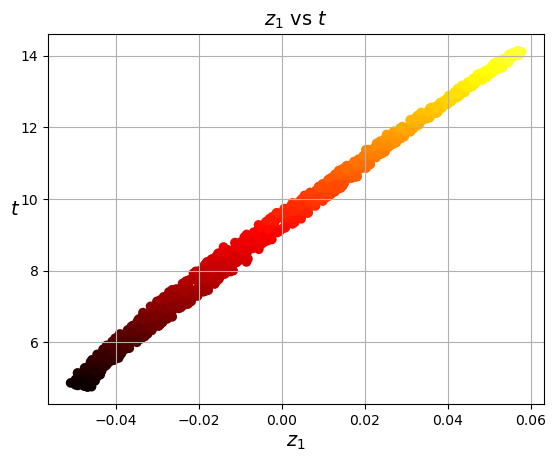

In [49]:
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

In [50]:
from sklearn.manifold import MDS 

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [53]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

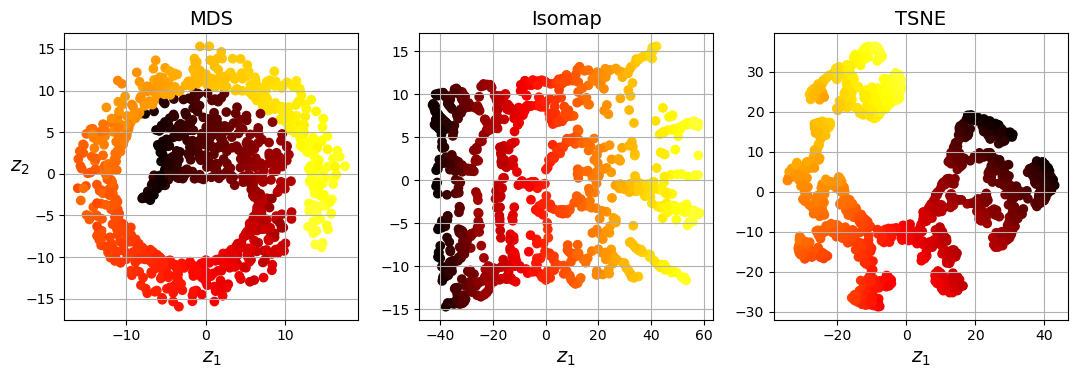

In [55]:
titles = ["MDS", "Isomap", "TSNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()